In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import re
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# DataSet 1

In [2]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book1.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,4002,LAKSHADWEEP,1901,22.6,86.4,114.8,263.8,37.3,459.0,0.0,0.0,46.7,183.7,229.9,15.0,1459.2,109.0,415.9,505.7,428.6
1,4003,LAKSHADWEEP,1902,99.3,9.6,32.6,40.4,179.1,374.2,413.3,170.0,214.3,384.2,192.8,49.0,2158.8,108.9,252.1,1171.8,626.0
2,4004,LAKSHADWEEP,1903,63.5,95.0,0.0,29.5,144.1,212.4,261.8,202.0,292.1,79.1,NaN,NaN,NaN,158.5,173.6,968.3,NaN
3,4005,LAKSHADWEEP,1904,0.0,0.0,13.5,13.2,143.3,261.3,256.0,38.9,219.9,153.6,8.3,68.9,1176.9,0.0,170.0,776.1,230.8
4,4006,LAKSHADWEEP,1905,62.4,0.0,0.0,0.0,166.7,400.7,68.7,377.5,107.5,232.1,159.3,0.0,1574.9,62.4,166.7,954.4,391.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
110,4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
111,4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
112,4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [3]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        114 non-null    int64  
 1   SUBDIVISION  114 non-null    object 
 2   YEAR         114 non-null    int64  
 3   JAN          112 non-null    float64
 4   FEB          113 non-null    float64
 5   MAR          112 non-null    float64
 6   APR          112 non-null    float64
 7   MAY          112 non-null    float64
 8   JUN          112 non-null    float64
 9   JUL          111 non-null    float64
 10  AUG          112 non-null    float64
 11  SEP          111 non-null    float64
 12  OCT          111 non-null    float64
 13  NOV          108 non-null    float64
 14  DEC          110 non-null    float64
 15  ANNUAL       103 non-null    float64
 16  Jan-Feb      111 non-null    float64
 17  Mar-May      110 non-null    float64
 18  Jun-Sep      110 non-null    float64
 19  Oct-Dec 

In [4]:
b=a.fillna(method='ffill')
b

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,4002,LAKSHADWEEP,1901,22.6,86.4,114.8,263.8,37.3,459.0,0.0,0.0,46.7,183.7,229.9,15.0,1459.2,109.0,415.9,505.7,428.6
1,4003,LAKSHADWEEP,1902,99.3,9.6,32.6,40.4,179.1,374.2,413.3,170.0,214.3,384.2,192.8,49.0,2158.8,108.9,252.1,1171.8,626.0
2,4004,LAKSHADWEEP,1903,63.5,95.0,0.0,29.5,144.1,212.4,261.8,202.0,292.1,79.1,192.8,49.0,2158.8,158.5,173.6,968.3,626.0
3,4005,LAKSHADWEEP,1904,0.0,0.0,13.5,13.2,143.3,261.3,256.0,38.9,219.9,153.6,8.3,68.9,1176.9,0.0,170.0,776.1,230.8
4,4006,LAKSHADWEEP,1905,62.4,0.0,0.0,0.0,166.7,400.7,68.7,377.5,107.5,232.1,159.3,0.0,1574.9,62.4,166.7,954.4,391.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
110,4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
111,4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
112,4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


<AxesSubplot:>

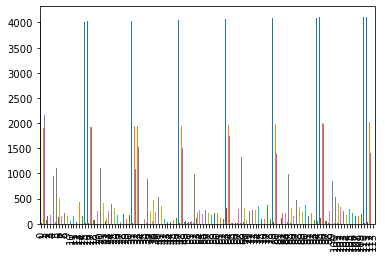

In [21]:
b.plot.bar(legend=None)

<AxesSubplot:>

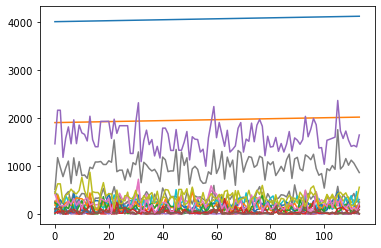

In [20]:
b.plot.line(legend=None)

<AxesSubplot:>

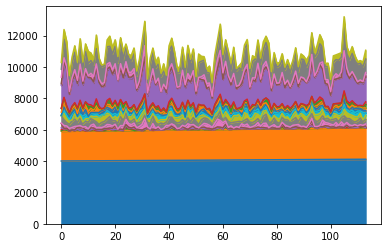

In [19]:
b.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

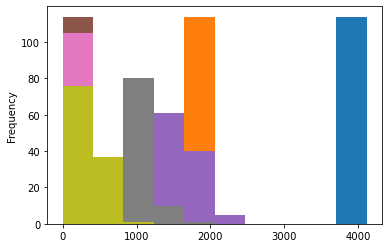

In [18]:
b.plot.hist(legend=None)

<AxesSubplot:ylabel='YEAR'>

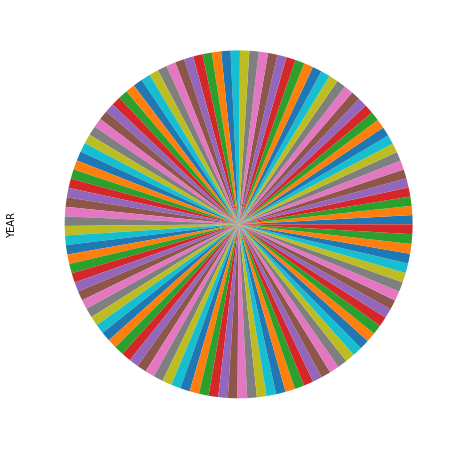

In [31]:
b.plot.pie(y='YEAR',figsize=(8,8),labels=None,legend=None)

# DataSet 2

In [22]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book2.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,3887,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,73.4,386.2,2122.8,666.1
1,3888,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,9.3,275.7,2403.4,638.2
2,3889,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,21.7,336.3,2343.0,570.1
3,3890,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,26.7,339.4,2398.2,365.3
4,3891,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,23.4,378.5,1881.5,458.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,3997,KERALA,2011,20.5,45.7,24.1,165.2,124.2,788.5,536.8,492.7,391.2,227.2,169.7,49.5,3035.1,66.2,313.5,2209.1,446.3
111,3998,KERALA,2012,7.4,11.0,21.0,171.1,95.3,430.3,362.6,501.6,241.1,187.5,112.9,9.4,2151.1,18.3,287.4,1535.6,309.8
112,3999,KERALA,2013,3.9,40.1,49.9,49.3,119.3,1042.7,830.2,369.7,318.6,259.9,154.9,17.0,3255.4,43.9,218.5,2561.2,431.8
113,4000,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,14.9,364.5,2164.8,502.1


In [23]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

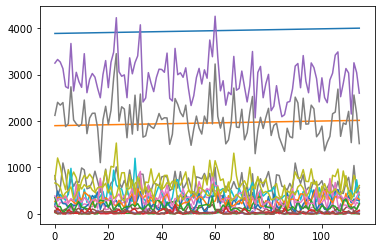

In [25]:
a.plot.line(legend=None)

<AxesSubplot:>

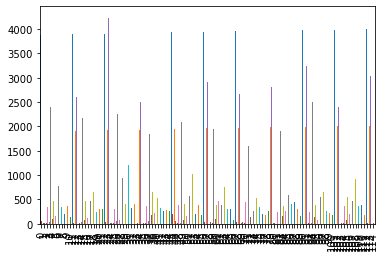

In [26]:
a.plot.bar(legend=None)

<AxesSubplot:>

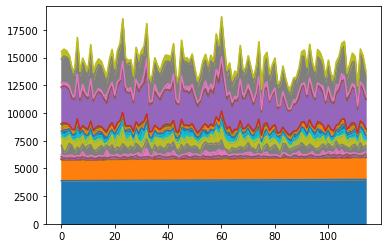

In [27]:
a.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

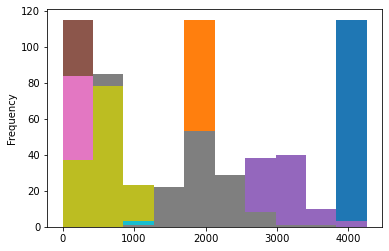

In [28]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='MAY'>

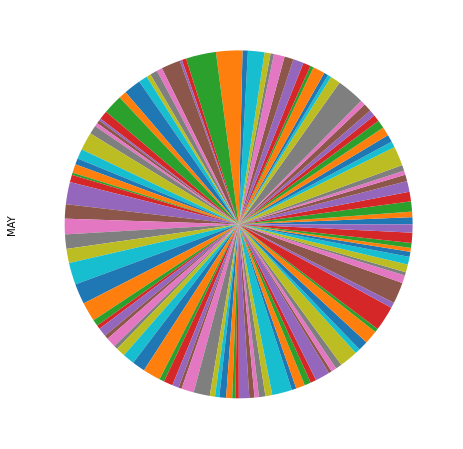

In [32]:
a.plot.pie(y='MAY',figsize=(8,8),labels=None,legend=None)

# DataSet 3

In [33]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book3.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,3657,NORTH INTERIOR KARNATAKA,1901,3.5,18.8,7.1,67.2,65.5,120.5,151.9,115.1,128.8,80.0,13.6,0.9,773.0,22.3,139.8,516.4,94.5
1,3658,NORTH INTERIOR KARNATAKA,1902,0.0,0.0,0.3,22.5,34.4,111.3,83.2,78.1,146.7,118.8,35.7,85.1,716.1,0.0,57.1,419.3,239.6
2,3659,NORTH INTERIOR KARNATAKA,1903,3.5,0.0,0.1,6.9,53.4,102.8,209.4,146.4,189.3,166.4,34.3,16.0,928.5,3.5,60.3,647.9,216.8
3,3660,NORTH INTERIOR KARNATAKA,1904,0.2,0.3,8.5,11.0,46.3,120.6,91.6,48.5,165.1,86.5,0.0,0.0,578.6,0.5,65.8,425.8,86.5
4,3661,NORTH INTERIOR KARNATAKA,1905,0.0,6.0,2.6,16.0,51.2,99.6,60.1,139.2,42.2,85.0,4.4,0.0,506.2,6.0,69.8,341.1,89.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,3767,NORTH INTERIOR KARNATAKA,2011,0.5,7.2,7.2,41.2,46.8,101.3,150.8,152.0,69.0,73.4,5.7,0.0,655.2,7.7,95.2,473.1,79.2
111,3768,NORTH INTERIOR KARNATAKA,2012,28.5,6.2,0.4,35.4,19.5,60.0,114.5,105.5,79.2,85.2,46.5,2.9,583.8,34.7,55.3,359.3,134.5
112,3769,NORTH INTERIOR KARNATAKA,2013,1.2,6.1,3.0,25.4,47.4,99.4,160.7,73.9,201.0,101.0,4.2,0.1,723.2,7.3,75.7,534.9,105.2
113,3770,NORTH INTERIOR KARNATAKA,2014,0.0,6.1,29.2,26.4,93.0,50.4,136.8,205.2,90.2,80.3,25.0,14.1,756.8,6.1,148.7,482.5,119.5


In [34]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

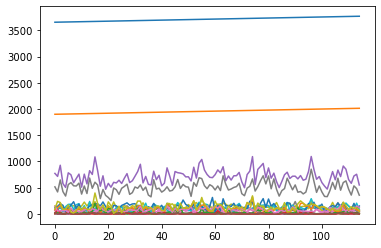

In [35]:
a.plot.line(legend=None)

<AxesSubplot:>

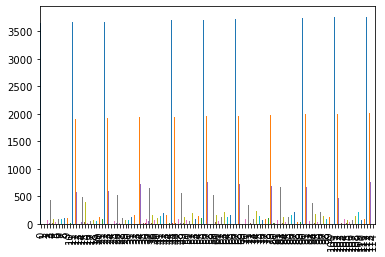

In [36]:
a.plot.bar(legend=None)

<AxesSubplot:>

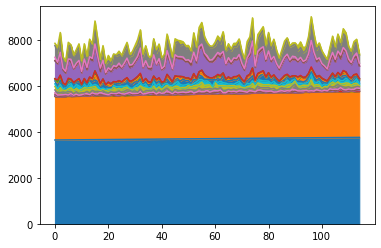

In [37]:
a.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

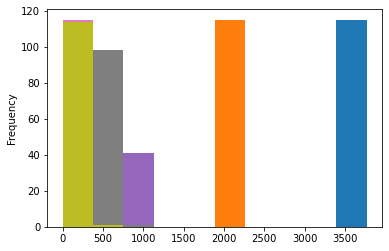

In [38]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='FEB'>

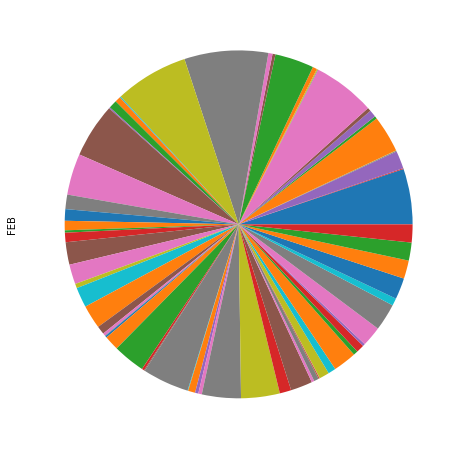

In [39]:
a.plot.pie(y='FEB',figsize=(8,8),labels=None,legend=None)

# DataSet 4

In [40]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book4.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,3542,COASTAL KARNATAKA,1901,1.8,0.6,10.7,52.4,81.6,960.9,991.2,606.4,108.0,120.5,104.9,17.8,3056.9,2.4,144.7,2666.6,243.3
1,3543,COASTAL KARNATAKA,1902,3.2,0.3,4.9,10.2,54.6,698.4,1401.6,454.2,708.4,180.4,50.8,132.2,3699.2,3.5,69.7,3262.6,363.5
2,3544,COASTAL KARNATAKA,1903,0.7,0.0,0.0,4.1,202.8,536.5,1405.5,593.8,304.4,185.0,79.3,5.3,3317.4,0.7,206.9,2840.1,269.6
3,3545,COASTAL KARNATAKA,1904,2.4,0.0,4.8,23.7,93.2,1108.2,1070.0,465.6,245.3,127.2,0.7,0.0,3141.1,2.4,121.7,2889.1,127.9
4,3546,COASTAL KARNATAKA,1905,0.0,0.2,0.0,6.4,83.1,767.3,777.3,586.9,172.9,222.2,36.1,0.0,2652.3,0.2,89.4,2304.3,258.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,3652,COASTAL KARNATAKA,2011,4.8,3.8,8.7,66.1,49.3,1018.4,1080.5,861.3,545.2,178.8,81.5,10.2,3908.6,8.6,124.1,3505.4,270.5
111,3653,COASTAL KARNATAKA,2012,NaN,11.4,5.1,77.0,22.9,650.9,754.6,1027.6,382.0,115.1,68.0,3.6,NaN,NaN,104.9,2815.1,186.7
112,3654,COASTAL KARNATAKA,2013,2.4,19.6,19.0,28.5,100.4,1153.0,1515.3,680.2,379.1,265.1,56.9,10.0,4229.4,21.9,147.9,3727.6,332.0
113,3655,COASTAL KARNATAKA,2014,0.0,0.3,1.9,40.5,181.9,507.0,1155.4,1121.0,379.3,226.4,40.0,30.8,3684.4,0.3,224.3,3162.6,297.2


In [42]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          114 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       114 non-null    float64
 16  Jan-Feb      114 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

In [43]:
b=a.fillna(method='ffill')
b

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,3542,COASTAL KARNATAKA,1901,1.8,0.6,10.7,52.4,81.6,960.9,991.2,606.4,108.0,120.5,104.9,17.8,3056.9,2.4,144.7,2666.6,243.3
1,3543,COASTAL KARNATAKA,1902,3.2,0.3,4.9,10.2,54.6,698.4,1401.6,454.2,708.4,180.4,50.8,132.2,3699.2,3.5,69.7,3262.6,363.5
2,3544,COASTAL KARNATAKA,1903,0.7,0.0,0.0,4.1,202.8,536.5,1405.5,593.8,304.4,185.0,79.3,5.3,3317.4,0.7,206.9,2840.1,269.6
3,3545,COASTAL KARNATAKA,1904,2.4,0.0,4.8,23.7,93.2,1108.2,1070.0,465.6,245.3,127.2,0.7,0.0,3141.1,2.4,121.7,2889.1,127.9
4,3546,COASTAL KARNATAKA,1905,0.0,0.2,0.0,6.4,83.1,767.3,777.3,586.9,172.9,222.2,36.1,0.0,2652.3,0.2,89.4,2304.3,258.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,3652,COASTAL KARNATAKA,2011,4.8,3.8,8.7,66.1,49.3,1018.4,1080.5,861.3,545.2,178.8,81.5,10.2,3908.6,8.6,124.1,3505.4,270.5
111,3653,COASTAL KARNATAKA,2012,4.8,11.4,5.1,77.0,22.9,650.9,754.6,1027.6,382.0,115.1,68.0,3.6,3908.6,8.6,104.9,2815.1,186.7
112,3654,COASTAL KARNATAKA,2013,2.4,19.6,19.0,28.5,100.4,1153.0,1515.3,680.2,379.1,265.1,56.9,10.0,4229.4,21.9,147.9,3727.6,332.0
113,3655,COASTAL KARNATAKA,2014,0.0,0.3,1.9,40.5,181.9,507.0,1155.4,1121.0,379.3,226.4,40.0,30.8,3684.4,0.3,224.3,3162.6,297.2


<AxesSubplot:>

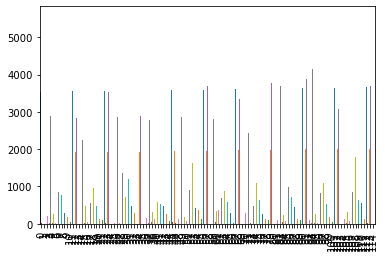

In [46]:
b.plot.bar(legend=None)

<AxesSubplot:>

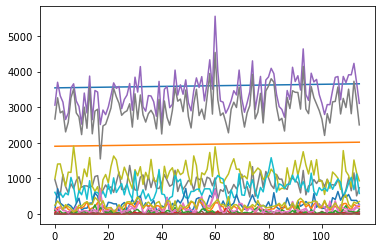

In [47]:
b.plot.line(legend=None)

<AxesSubplot:>

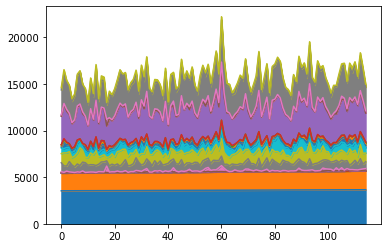

In [48]:
b.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

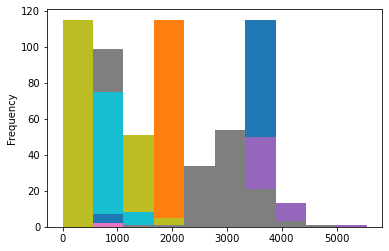

In [49]:
b.plot.hist(legend=None)

<AxesSubplot:ylabel='JUL'>

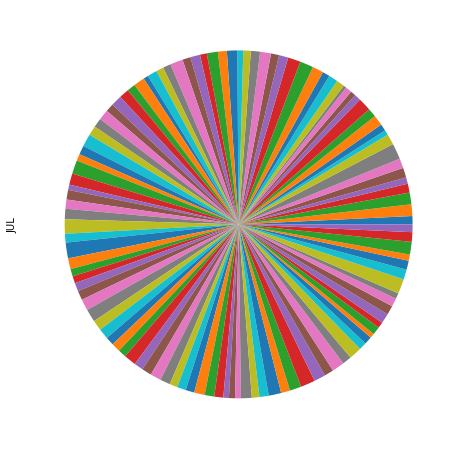

In [50]:
b.plot.pie(y='JUL',figsize=(8,8),labels=None,legend=None)

# DataSet 5

In [51]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book5.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,3427,TAMIL NADU,1901,24.5,39.1,21.7,36.0,74.0,41.8,49.3,67.9,191.1,122.3,212.3,80.4,960.3,63.6,131.6,350.1,415.0
1,3428,TAMIL NADU,1902,67.2,9.8,25.1,21.9,84.7,39.3,55.1,113.8,98.6,282.2,174.9,165.8,1138.2,77.0,131.7,306.7,622.9
2,3429,TAMIL NADU,1903,19.3,7.8,1.7,18.2,128.5,58.5,72.6,115.0,210.4,128.1,200.5,203.2,1163.9,27.1,148.4,456.5,531.9
3,3430,TAMIL NADU,1904,35.2,0.1,0.7,19.5,121.9,34.9,89.0,40.4,85.7,163.2,23.6,49.1,663.1,35.3,142.1,249.9,235.8
4,3431,TAMIL NADU,1905,6.5,7.5,17.2,64.8,83.7,49.8,39.0,101.8,73.5,250.4,123.7,3.2,821.1,14.0,165.7,264.1,377.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,3537,TAMIL NADU,2011,4.3,11.2,8.0,91.5,33.4,56.0,45.5,128.9,76.0,200.4,230.5,41.0,926.5,15.5,132.8,306.4,471.8
111,3538,TAMIL NADU,2012,3.0,0.1,2.5,35.5,41.9,30.1,46.5,98.0,84.9,235.2,44.5,14.0,636.1,3.1,79.9,259.5,293.6
112,3539,TAMIL NADU,2013,3.9,30.9,30.0,20.3,42.0,54.6,42.7,110.7,113.5,127.9,112.3,53.2,741.9,34.8,92.2,321.5,293.4
113,3540,TAMIL NADU,2014,7.4,6.1,8.1,8.3,139.1,47.8,50.6,117.7,98.9,252.2,110.8,66.0,913.0,13.4,155.5,315.1,428.9


In [52]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

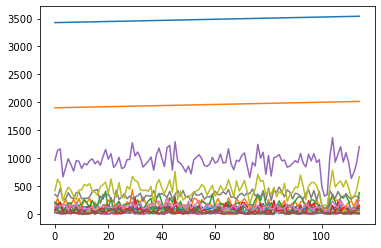

In [53]:
a.plot.line(legend=None)

<AxesSubplot:>

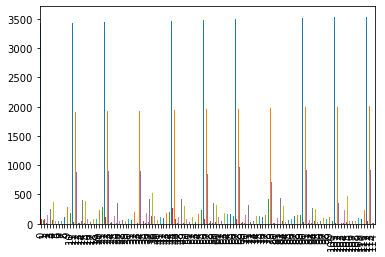

In [54]:
a.plot.bar(legend=None)

<AxesSubplot:>

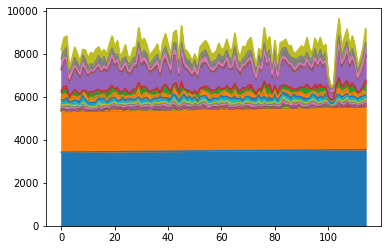

In [55]:
a.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

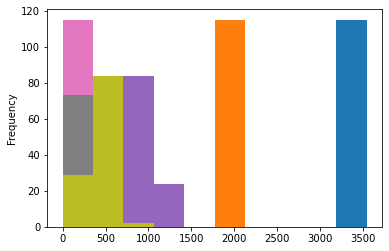

In [56]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='MAR'>

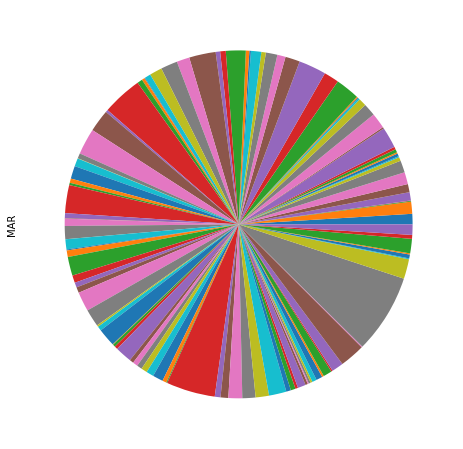

In [57]:
a.plot.pie(y='MAR',figsize=(8,8),labels=None,legend=None)

# DataSet 6

In [58]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book6.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,3772,SOUTH INTERIOR KARNATAKA,1901,4.9,31.8,3.0,32.7,109.6,106.0,210.0,109.2,140.8,170.1,72.5,12.3,1003.0,36.8,145.4,566.0,254.9
1,3773,SOUTH INTERIOR KARNATAKA,1902,1.9,0.5,6.7,42.6,97.7,91.7,210.0,82.1,138.4,219.1,44.6,84.9,1020.1,2.4,147.0,522.3,348.5
2,3774,SOUTH INTERIOR KARNATAKA,1903,0.3,0.0,1.1,11.6,125.1,129.7,284.4,155.7,197.1,154.2,186.6,24.1,1269.9,0.3,137.7,766.9,364.9
3,3775,SOUTH INTERIOR KARNATAKA,1904,1.0,0.5,5.2,43.5,144.7,167.9,197.1,73.2,89.6,120.4,2.5,0.3,845.8,1.5,193.3,527.8,123.2
4,3776,SOUTH INTERIOR KARNATAKA,1905,1.7,7.9,14.2,23.6,118.6,95.9,148.4,140.6,43.1,142.8,22.4,0.3,759.4,9.5,156.5,427.9,165.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,3882,SOUTH INTERIOR KARNATAKA,2011,2.1,12.4,12.4,80.2,83.5,177.1,202.4,199.5,111.2,144.8,56.7,5.0,1087.4,14.5,176.1,690.2,206.5
111,3883,SOUTH INTERIOR KARNATAKA,2012,4.6,5.5,8.1,99.0,45.6,81.8,144.7,236.5,100.6,62.8,82.6,6.2,877.8,10.1,152.6,563.5,151.6
112,3884,SOUTH INTERIOR KARNATAKA,2013,0.5,10.1,11.7,34.6,95.6,176.2,307.4,151.7,191.8,103.7,24.9,2.4,1110.7,10.6,142.0,827.1,131.0
113,3885,SOUTH INTERIOR KARNATAKA,2014,0.4,2.4,17.7,46.7,130.5,106.8,271.6,254.6,161.6,152.9,20.2,18.7,1184.2,2.8,195.0,794.5,191.8


In [59]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

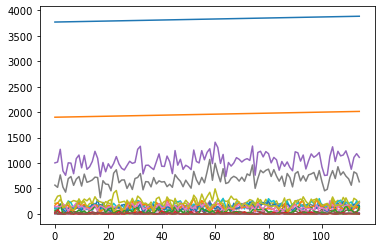

In [60]:
a.plot.line(legend=None)

<AxesSubplot:>

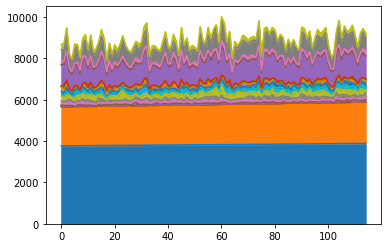

In [61]:
a.plot.area(legend=None)

<AxesSubplot:>

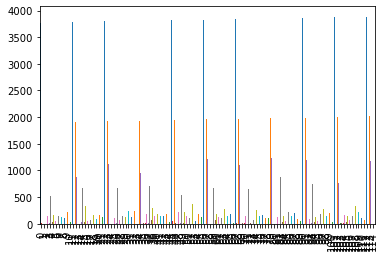

In [62]:
a.plot.bar(legend=None)

<AxesSubplot:ylabel='Frequency'>

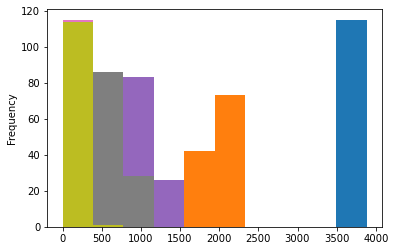

In [63]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='DEC'>

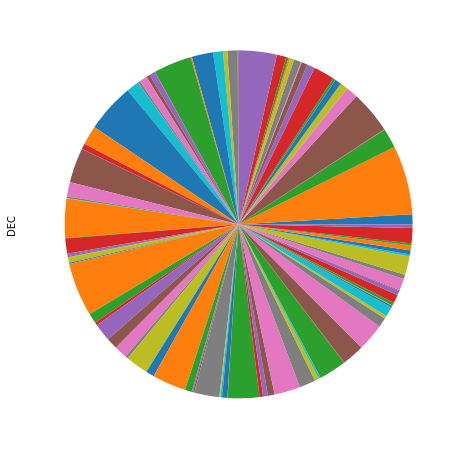

In [64]:
a.plot.pie(y='DEC',figsize=(8,8),labels=None,legend=None)